<a href="https://colab.research.google.com/github/pcpiscator/Ciencia-de-dados/blob/master/Tarefa_da_Semana_4_C%C3%B3piada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECD - Introdução à Visualização de Dados - Semana 4
## Exercícios 
### Estatística Descritiva, Matriz de Correlação e Exploração de Dados usando Gráficos
##### Prof. Dr. Alessandro de Lima Bicho

## Olá, pessoal!

Em 15 de abril de 1912, o maior navio de passageiros já construído colidiu com um iceberg durante sua viagem inaugural. Quando o Titanic afundou, ele matou 1502 dos 2224 passageiros e tripulantes. Esta tragédia chocou a comunidade internacional, e levou a melhores regulamentos de segurança para os navios. Uma das razões pelas quais o naufrágio resultou em tal perda de vidas foi que não havia botes salva-vidas suficientes para os passageiros e tripulantes. Embora houvesse algum elemento de sorte envolvido em sobreviver ao naufrágio, alguns grupos de pessoas tinham maior probabilidade de sobreviver do que outros.

O dataset titanic.csv contém dados de 887 passageiros reais do Titanic. Cada linha representa uma pessoa. As colunas descrevem diferentes atributos sobre a pessoa, incluindo:
- Survived (sobreviveu): se sobreviveu ao naufrágio estará com 1, e 0 (zero) se não sobreviveu;
- Pclass: tipo de classe de passagem (Do 1 ao 3), sendo 1 a melhor classe e 3 a pior classe;
- Name: nome do passageiro(a);
- Sex: gênero do passageiro, sendo masculino e feminino;
- Age: idade do passageiro na data da ocorrência do naufrágio;
- Siblings/Spouses Aboard: número de irmãos/cônjuges a bordo;
- Parents/Children Aboard: número de pais/filhos a bordo;
- Fare: valor da passagem.	

Nesta tarefa, temos duas questões que procurarão fundamentar estatiscamente suas conclusões sobre os sobreviventes deste naufrágio.

Bons estudos! 

Abraço, Alessandro.

Aqui nós importamos o dataset, que está disponível no meu Google Drive. Caso queiram, podem fazer o download do dataset através do link informado na função `read_csv()` (para análise no Microsoft Excel, por exemplo). 

In [ ]:
#importar a biblioteca pandas
import pandas as pd
#pd.options.display.max_columns = None
#pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("https://drive.google.com/uc?export=view&id=1Ad2NNAqsCDGwl125D7z-nSbPLVpCFlYu", error_bad_lines=False, encoding = "ISO-8859-1", sep = ",")
df

1) Ao rever os dados de 887 passageiros do naufrágio do Titanic, você, cientista de dados, percebe que pode haver uma **correlação** que explique os sobreviventes deste naufrágio! Demonstre, através dos ensinamentos das Semanas 3 e 4, como estatísticamente podemos fundamentar nossa resposta. Explore os possíveis métodos.

In [3]:
# Responda aqui a questão 1
#Inicialemente tentaremos encontrar correlações entre as colunas.
#Vamos criar uma coluna Sex_int para inclui-la na tabela abaixo
df['Sex_int']=df['Sex'].apply(lambda x:0 if x=='female' else 1)
df.corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_int
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.091875
Siblings_Spouses_Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.113249
Parents_Children_Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.181137
Sex_int,-0.542152,0.129507,0.091875,-0.113249,-0.244337,-0.181137,1.000000


Daqui tiramos algumas correlações interessantes a serem investigadas: Survived x Sex_int (-0.54), Survived x Pclass (-0,34) e Pclass x Fare (-0.55) (essa é bastante óbvia).  

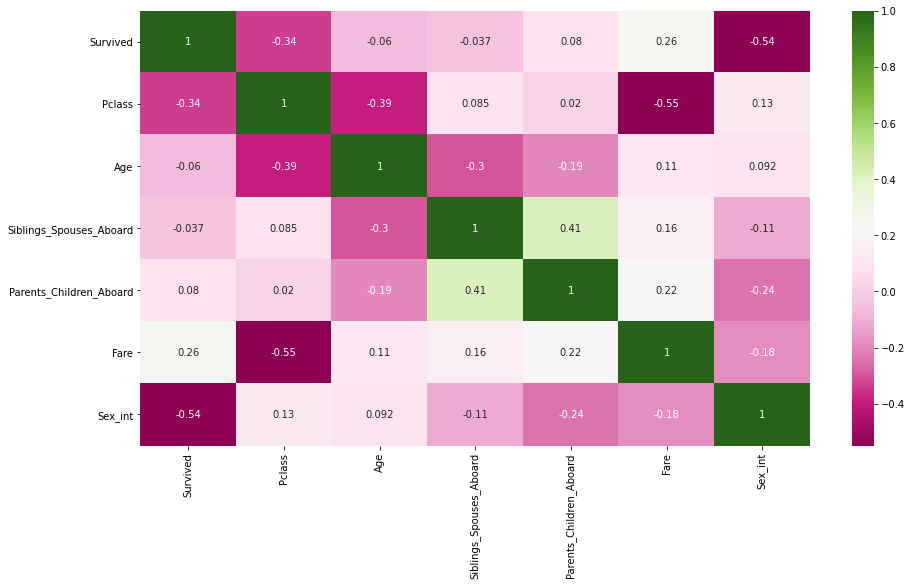

In [ ]:
#Visualizando de outra forma
plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='PiYG')

In [ ]:
df.describe()

,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_int
count,887.00,887.00,887.00,887.00,887.00,887.00,887.00
mean,0.39,2.31,29.47,0.53,0.38,32.31,0.65
std,0.49,0.84,14.12,1.10,0.81,49.78,0.48
min,0.00,1.00,0.42,0.00,0.00,0.00,0.00
25%,0.00,2.00,20.25,0.00,0.00,7.92,0.00
50%,0.00,3.00,28.00,0.00,0.00,14.45,1.00
75%,1.00,3.00,38.00,1.00,0.00,31.14,1.00
max,1.00,3.00,80.00,8.00,6.00,512.33,1.00


Daqui tiramos algumas conclusões. Há 887 pessoas no Dataset. Apenas 39% das pessoas sobreviveram. A maioria viajava na 2a ou 3a  Classes (a média de Pclass está entre 2 e 3). A média de idade era de 29.47 anos o mais novo tinha 0,42 anos (pouco mais de 5 meses) e o mais velho 80 anos.

In [ ]:
df.groupby('Sex').mean()


,Survived,Pclass,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_int
Sex,,,,,,,
female,0.74,2.16,27.72,0.69,0.65,44.48,0.00
male,0.19,2.39,30.43,0.43,0.24,25.63,1.00


74% das mulheres sobreviveram e apenas 19% dos homens sobreviveram.

In [ ]:
df.groupby('Pclass').mean()

,Survived,Age,Siblings_Spouses_Aboard,Parents_Children_Aboard,Fare,Sex_int
Pclass,,,,,,
1,0.63,38.79,0.42,0.36,84.15,0.56
2,0.47,29.87,0.40,0.38,20.66,0.59
3,0.24,25.19,0.62,0.40,13.71,0.70


63 % das pessoas que sobreviveram eram da 1a Classe. 47% pertenciam à 2a Classe e apenas 24% era da 3a Classe.
Vamos verificar por sexo e classe a seguir.

In [ ]:
df.groupby(['Sex','Pclass']).mean()

Survived   Age  ...   Fare  Sex_int
Sex    Pclass                  ...                
female 1           0.97 35.26  ... 106.13     0.00
       2           0.92 28.98  ...  21.97     0.00
       3           0.50 22.14  ...  16.12     0.00
male   1           0.37 41.51  ...  67.23     1.00
       2           0.16 30.49  ...  19.74     1.00
       3           0.14 26.47  ...  12.70     1.00

[6 rows x 6 columns]

Quase todas as mulheres da 1a Classe (97%) sobreviveram, 92% das mulheres da 2a Classe e 50% da 3a Classe sobreviveram. Já os homens, 37% da 1a Classe sobreviveu, 16% da 2a Classe e apenas 14% da 3a Classe.

In [ ]:
#E as crianças?
df[df['Age']<=12].mean()

Survived                   0.54
Pclass                     2.68
Age                        4.94
Siblings_Spouses_Aboard    2.04
Parents_Children_Aboard    1.39
Fare                      31.56
Sex_int                    0.52
dtype: float64

In [ ]:
df[df['Age']>12].mean()

Survived                   0.37
Pclass                     2.27
Age                       31.87
Siblings_Spouses_Aboard    0.38
Parents_Children_Aboard    0.28
Fare                      32.38
Sex_int                    0.66
dtype: float64

Como se nota, as crianças tiveram uma maior chance de sobreviver (54% contra 37% dos que tinham mais de 12 anos)

Após as verificações acima, é possível inferir que as mulheres e crianças tiveram maior chance de sobreviver. Também é possível destacar que as pessoas em classe mais elevada tiveram maior chance de sobrevivência.

2) Apresente um gráfico de livre escolha que auxilie nas conclusões que expliquem os sobreviventes do naufrágio.

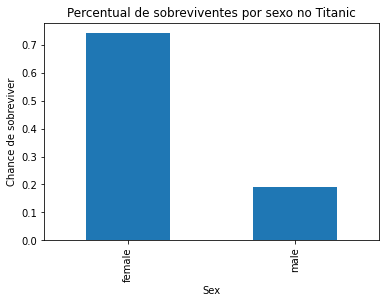

In [ ]:
# Responda aqui a questão 2
plt.title('Percentual de sobreviventes por sexo no Titanic')
plt.ylabel('Chance de sobreviver')
df.groupby('Sex')['Survived'].mean().plot(kind='bar')

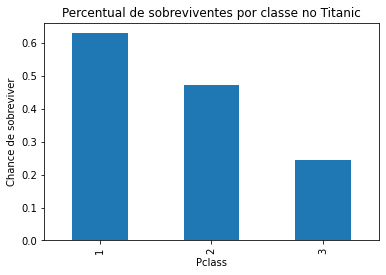

In [ ]:
plt.title('Percentual de sobreviventes por classe no Titanic')
plt.ylabel('Chance de sobreviver')
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')

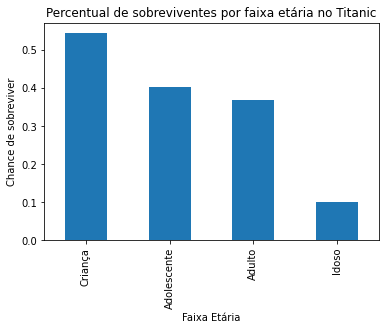

In [ ]:
#Vamos criar uma nova coluna baseado nas idades dos passageiros para analisarmos a chance de sobrevivencia por faixa etária
def Classifica (idade):
  if idade <= 12:
    return 'Criança'
  elif idade<=18:
    return 'Adolescente'
  elif idade<=65:
    return 'Adulto'
  else:
    return 'Idoso'
Fase=[]
for i in df['Age']:
  Fase.append(Classifica(i))
df2=df
df2['Faixa Etária']=Fase
#Agora, plotamos o gráfico de sobrevivente por faixa etária
plt.title('Percentual de sobreviventes por faixa etária no Titanic')
plt.ylabel('Chance de sobreviver')
df2.groupby('Faixa Etária')['Survived'].mean().sort_values(ascending=False).plot(kind='bar')



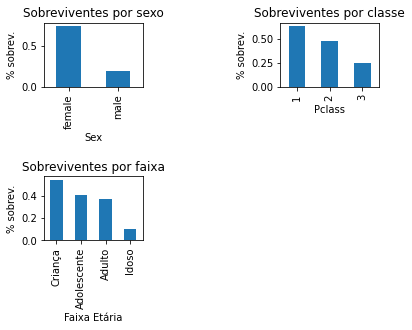

In [ ]:
#vamos combinar os três gráficos em um único
plt.subplot(3,3,1)
plt.title('Sobreviventes por sexo')
plt.ylabel('% sobrev.')
df.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.subplot(3,3,3)
plt.title('Sobreviventes por classe')
plt.ylabel('% sobrev.')
df.groupby('Pclass')['Survived'].mean().plot(kind='bar')
plt.subplot(3,3,7)
plt.title('Sobreviventes por faixa')
plt.ylabel('% sobrev.')
df2.groupby('Faixa Etária')['Survived'].mean().sort_values(ascending=False).plot(kind='bar')
